<a href="https://colab.research.google.com/github/fuatkeles/Appointment-App/blob/main/FUAT_KELES_IAI_Practical_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to AI - Practical Assignment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
  df = pd.read_csv("/content/drive/MyDrive/introAi/breast_cancer_dataset.csv")
  display(df.head())
except:
  print("Error : '/content/drive/MyDrive/introAi/breast_cancer_dataset.csv' Not Found")
  df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print("\nFirst Look at the Dataset")
df.info()
print("\nSummary of Dataset")
df_numeric = df.drop("id", axis = 1)
display(df_numeric.describe().T)



First Look at the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14 

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Main Parameter: Diagnosis
'M' (Malignant - Cancerous) veya 'B' (Benign - Not Cancerous)

Numbers of Diagnosises:
diagnosis
B    357
M    212
Name: count, dtype: int64


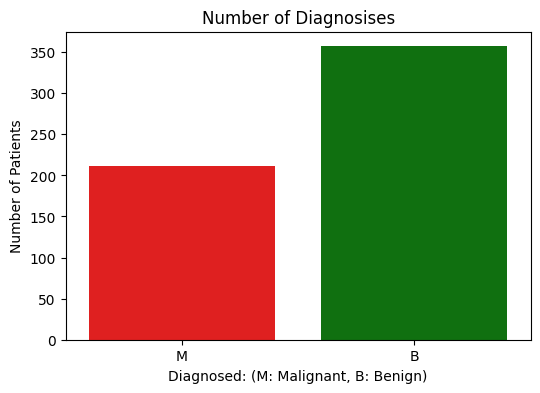

In [ ]:
print("Main Parameter: Diagnosis")
print("'M' (Malignant - Cancerous) veya 'B' (Benign - Not Cancerous)")

print("\nNumbers of Diagnosises:")
diagnosis_numbers = df['diagnosis'].value_counts()
print(diagnosis_numbers)

plt.figure(figsize = (6,4))
sns.countplot(x = 'diagnosis', data = df, hue="diagnosis", palette = {"M": "red", "B": "green"})
plt.title("Number of Diagnosises")
plt.xlabel("Diagnosed: (M: Malignant, B: Benign)")
plt.ylabel("Number of Patients")
plt.show()




Histogram of Numeric Features


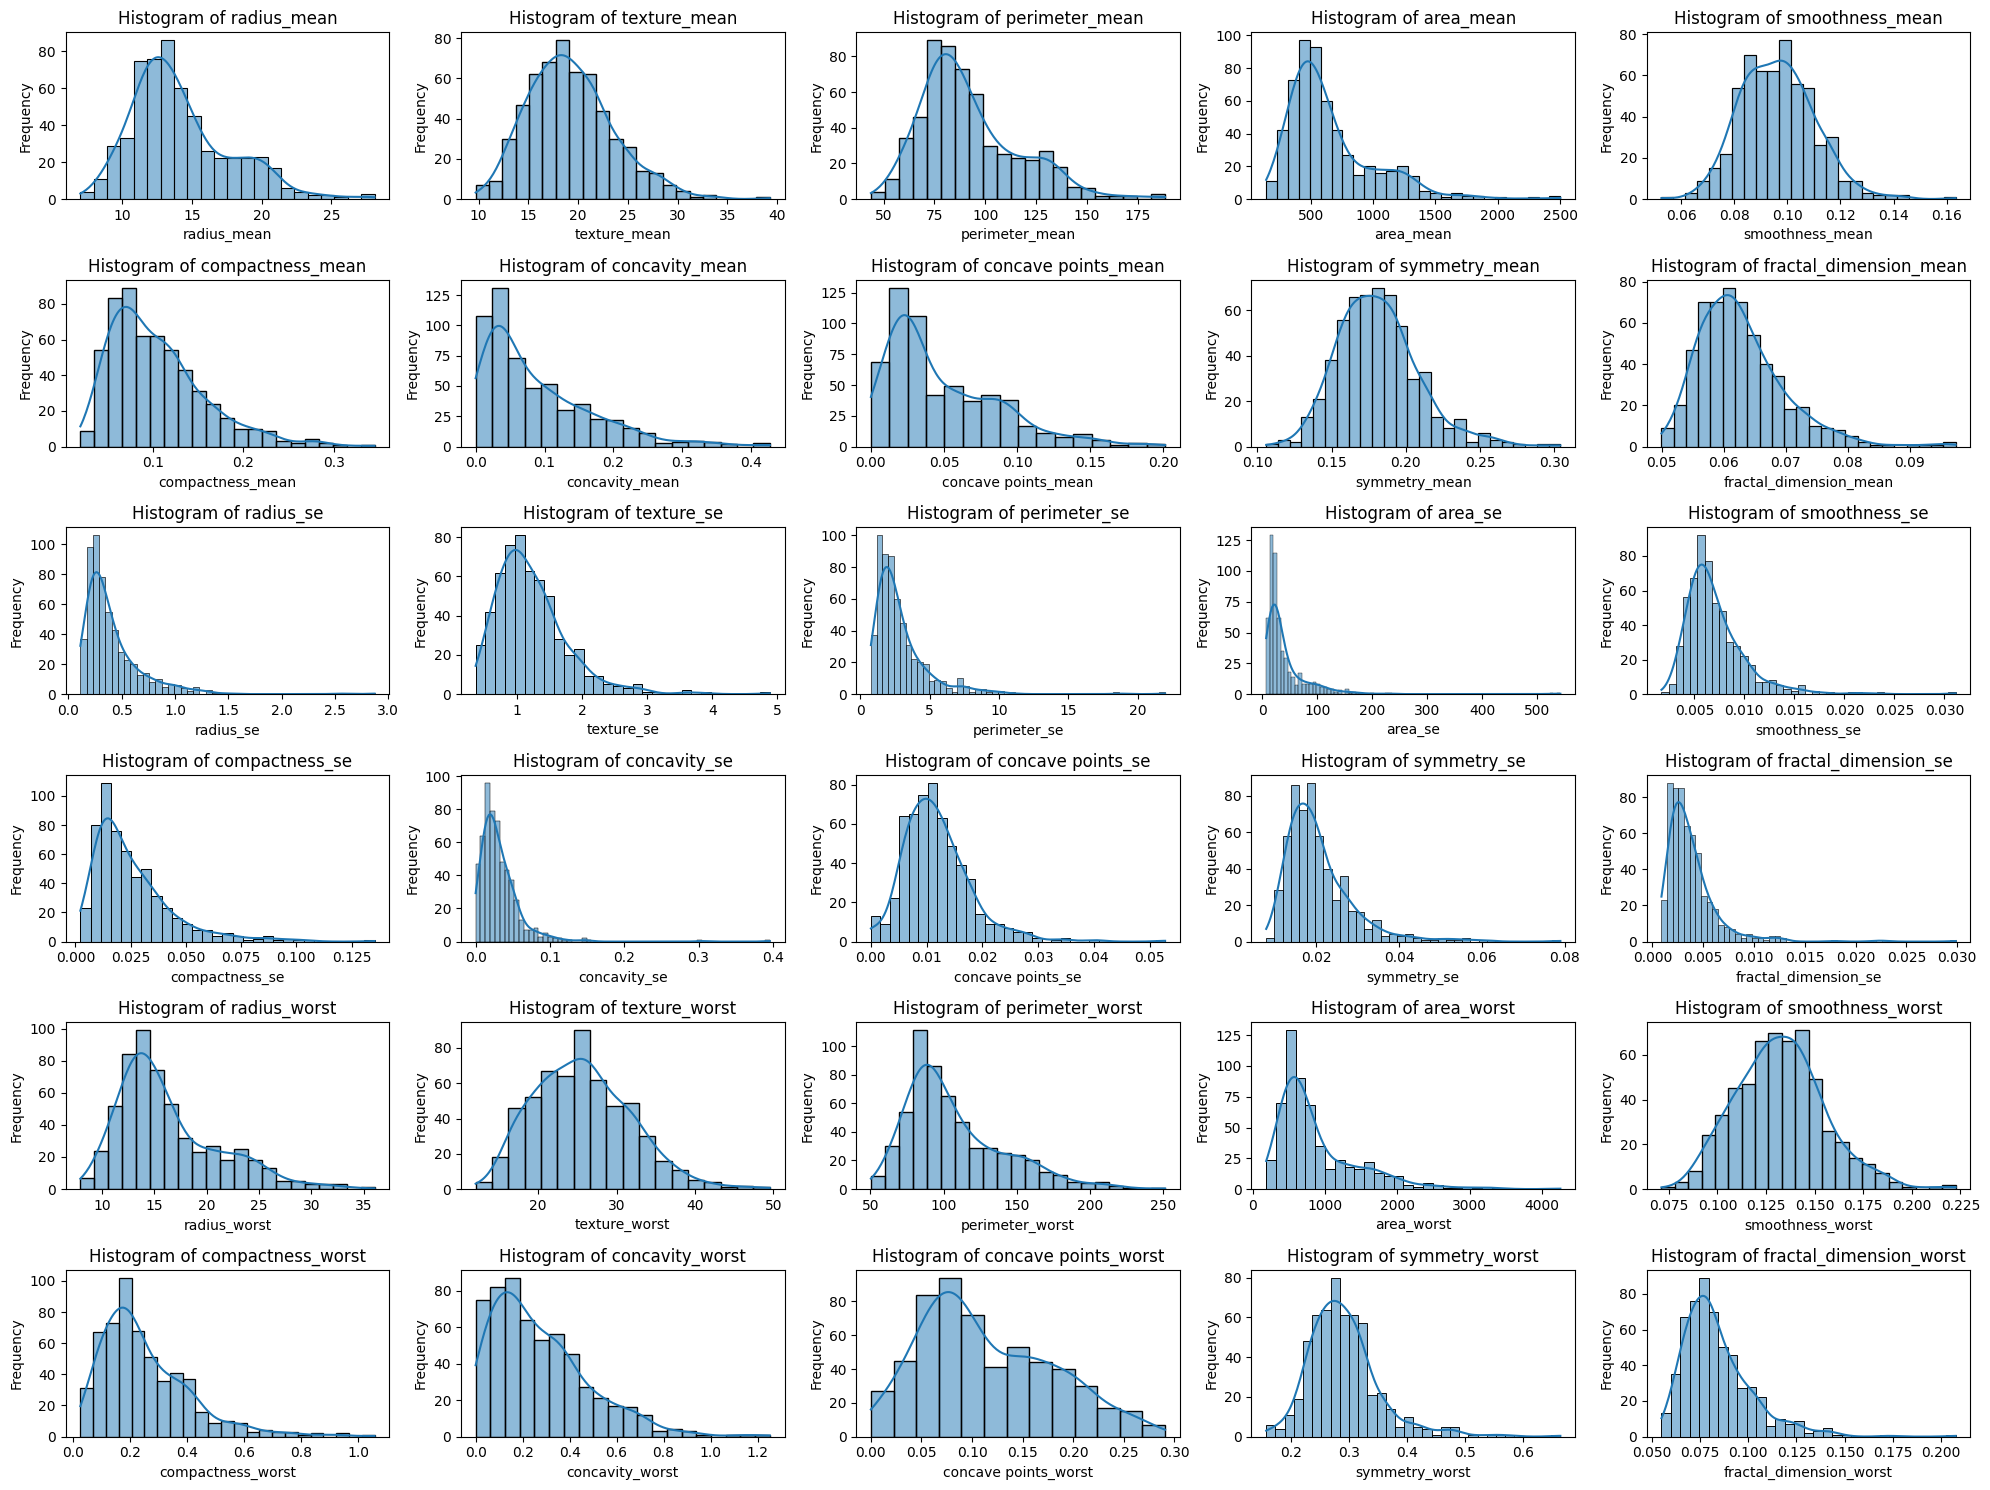

In [ ]:
num_features = df.drop(columns=["id", "diagnosis"]).columns

plt.figure(figsize=(20,15))



num_columns = 5

num_rows = (len(num_features) + num_columns - 1) // num_columns

print("Histogram of Numeric Features")
for i in num_features:
  plt.subplot(num_rows, num_columns, num_features.get_loc(i)+1)
  sns.histplot(data = df, x = i, kde = True)
  plt.title(f"Histogram of {i}")
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.tight_layout()

plt.show()


Box Plots of Numeric Features for Outlies


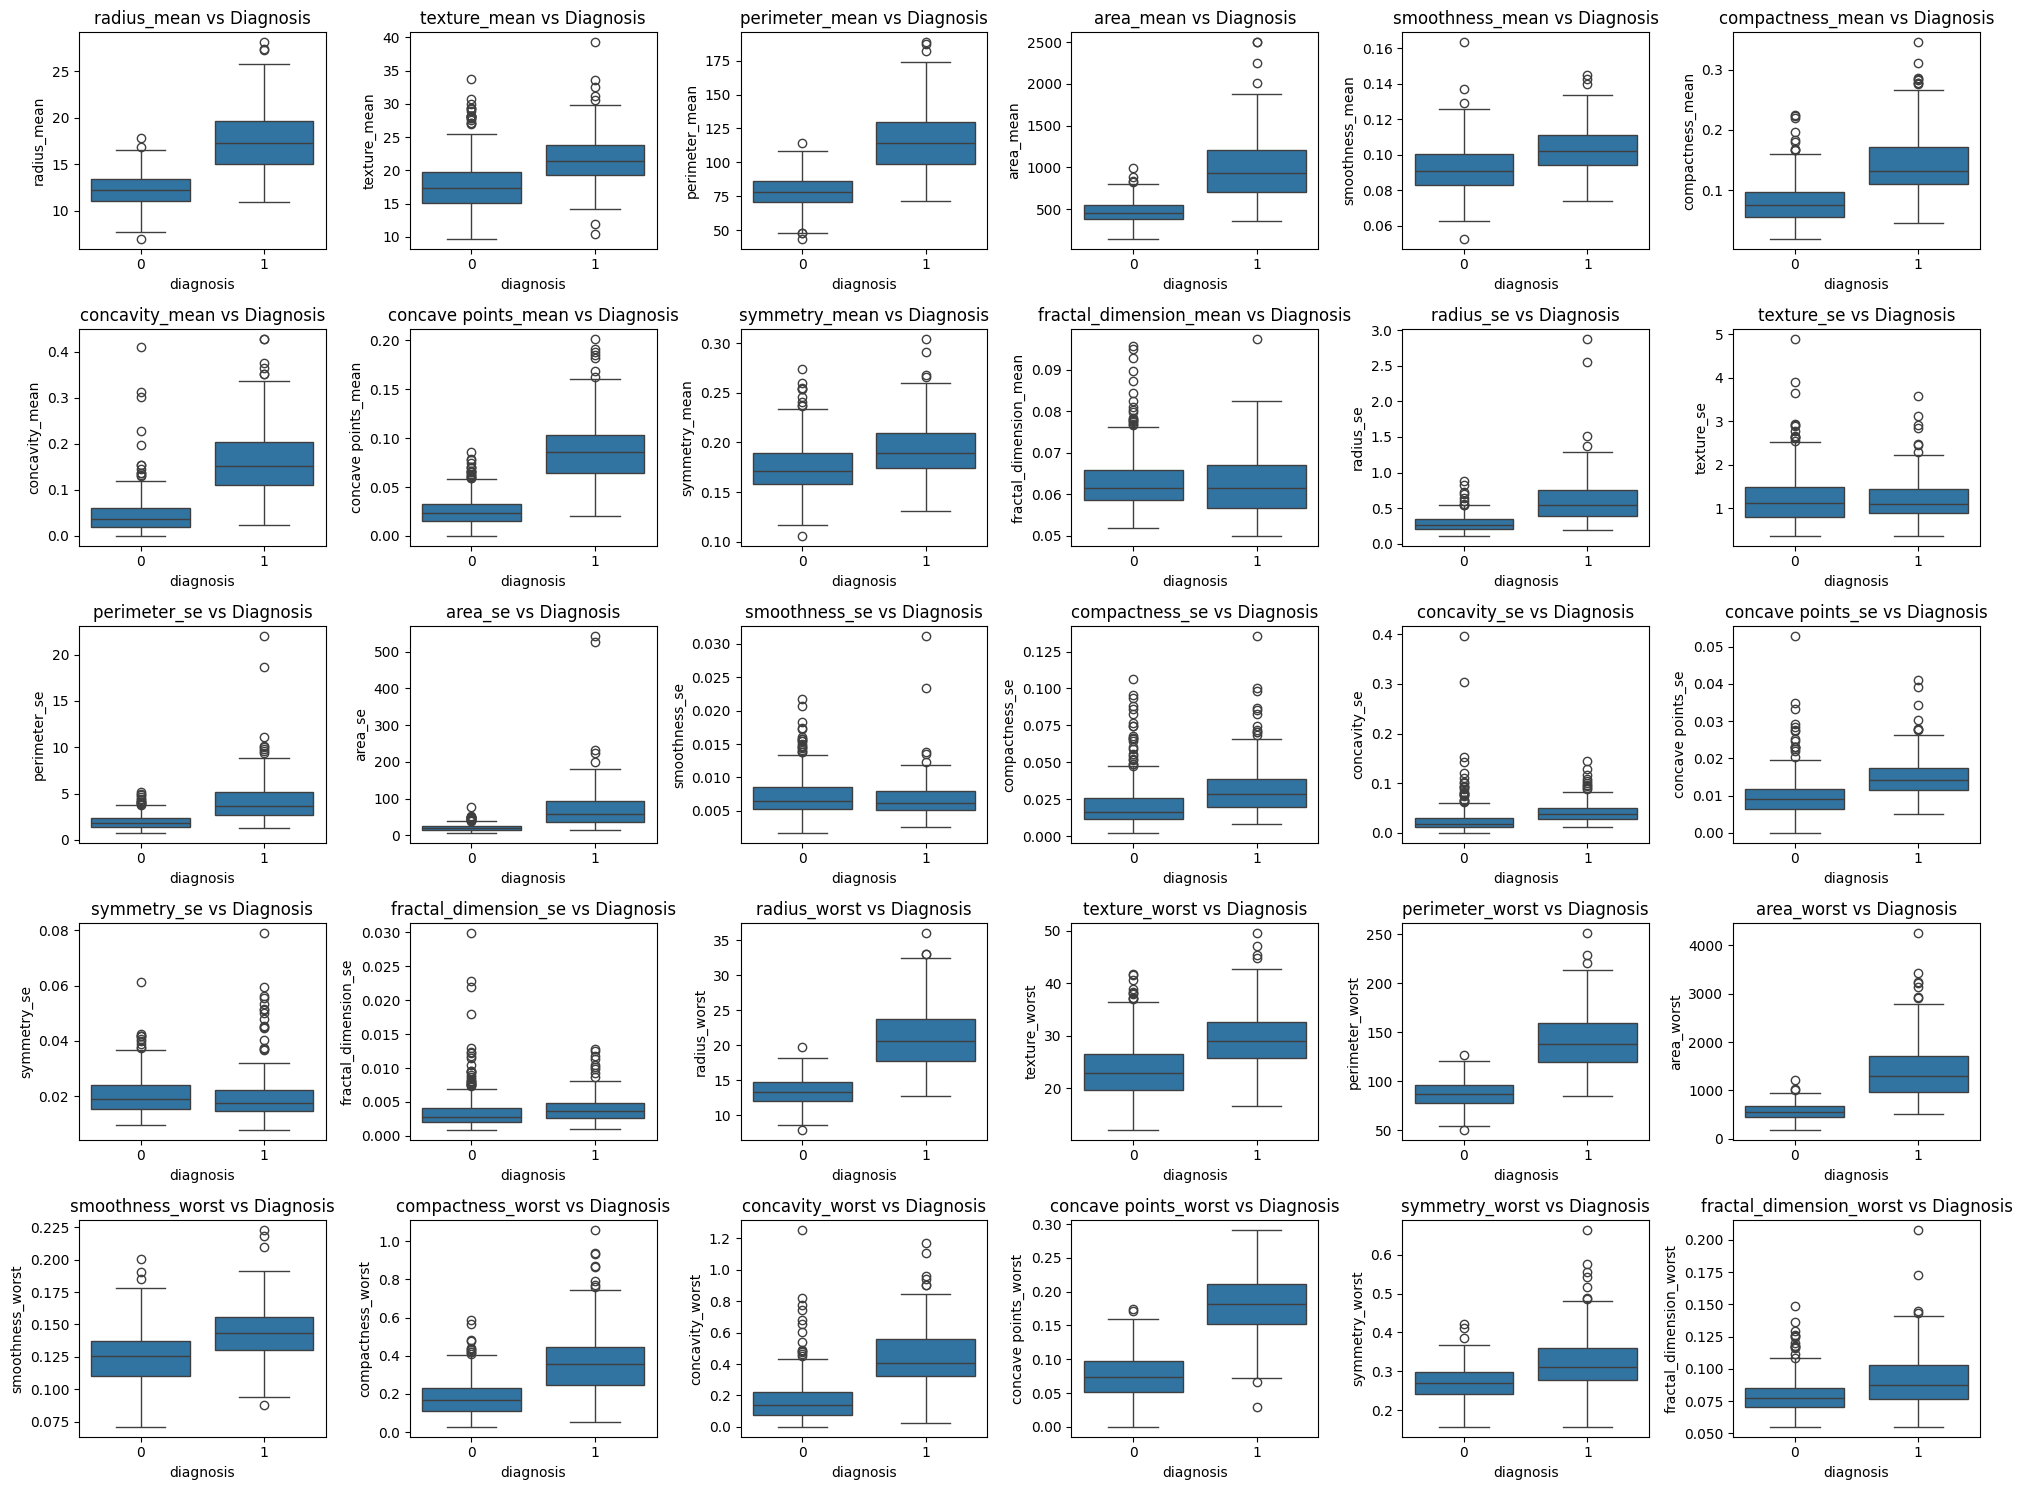

In [ ]:
print("\nBox Plots of Numeric Features for Outlies")

plt.figure(figsize=(20,15))

df_diagnosis = df['diagnosis'].map({"M":1, "B":0})

num_columns_box = 6

num_rows_box = (len(num_features) + num_columns_box - 1) // num_columns_box

for i, feature_name in enumerate(num_features):
  plt.subplot(num_rows_box, num_columns_box, i+1)
  sns.boxplot(data = df, y = feature_name, x = df_diagnosis)
  plt.title(f"{feature_name} vs Diagnosis")
  plt.ylabel(feature_name)
  plt.tight_layout()

plt.show()

<ipython-input-10-9d7b39107602>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "type", y = "value", data = plot_data, ax = ax_box, palette = {"Original": "skyblue", "Winsorized" : "orangered"})
<ipython-input-10-9d7b39107602>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "type", y = "value", data = plot_data, ax = ax_box, palette = {"Original": "skyblue", "Winsorized" : "orangered"})
<ipython-input-10-9d7b39107602>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "type", y = "value", data = plot_data, ax = ax_box, palette

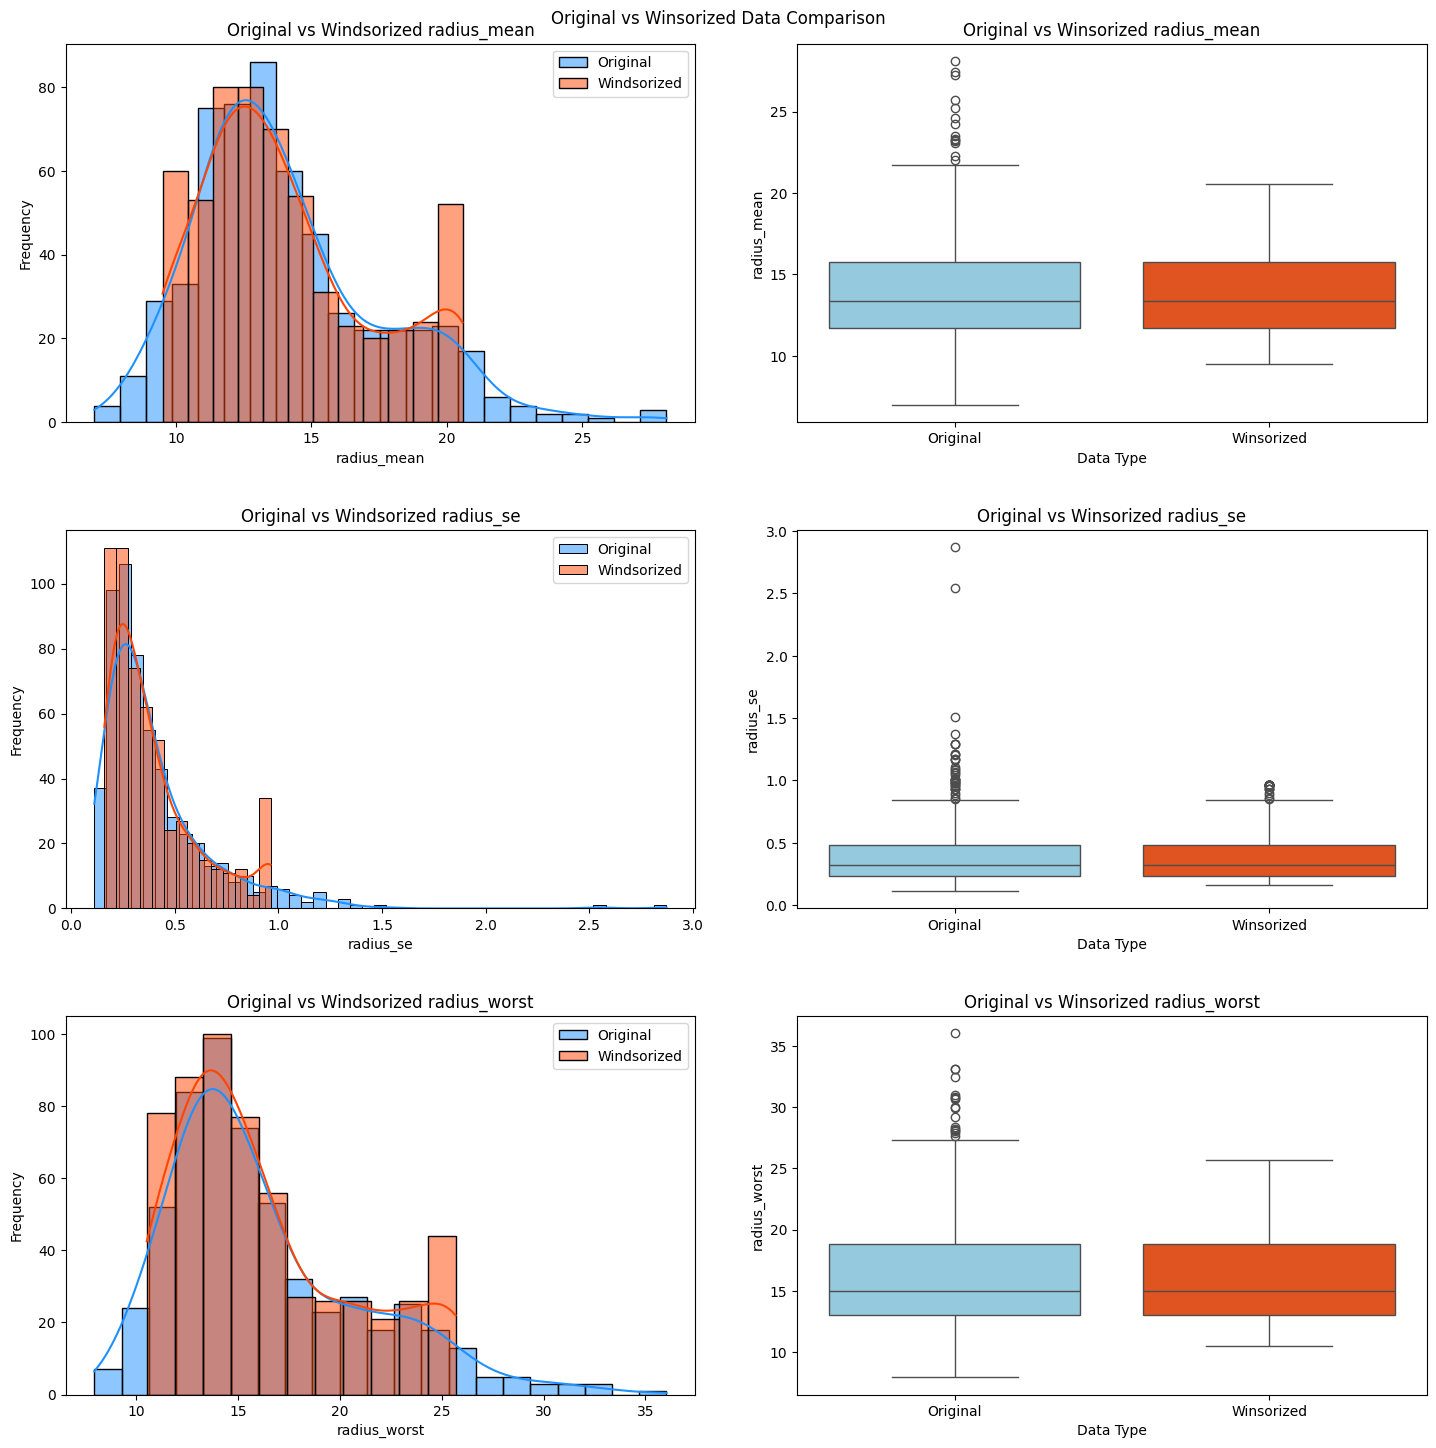


--- Original Dataset Statistics ---
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,13.08,122.80,1001.0,0.11840,0.20870,0.2439,0.12590,...,25.38,17.33,172.00,2010.0,0.1622,0.5646,0.6833,0.2378,0.4066,0.11890
1,842517,M,20.57,17.77,132.90,1311.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12590,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2378,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.11890,0.20870,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.1724,0.5646,0.6833,0.2378,0.4066,0.11980
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from scipy.stats.mstats import winsorize

data_winsor = df.copy()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id', 'diagnosis'], errors='ignore')

for feature in numeric_cols.columns:
    if feature in data_winsor.columns:
        data_winsor[feature] = winsorize(data_winsor[feature], limits=(0.05, 0.05))

cols = numeric_cols.columns.tolist()

columns_plot = ["radius_mean", "radius_se", "radius_worst"]

fig, axes = plt.subplots(len(columns_plot),2, figsize = (15, 5* len(columns_plot)))

for i, column in enumerate(columns_plot):
  ax_hist = axes[i,0]
  sns.histplot(df[column], color = "dodgerblue", label = "Original", kde = True, ax = ax_hist)
  sns.histplot(data_winsor[column], color = "orangered", label = "Windsorized", kde = True, ax = ax_hist)
  ax_hist.set_title(f"Original vs Windsorized {column}")
  ax_hist.set_xlabel(column)
  ax_hist.set_ylabel("Frequency")
  ax_hist.legend()


  ax_box = axes [i,1]
  plot_data = pd.DataFrame({
      "value": pd.concat([df[column], data_winsor[column]], ignore_index = True),
      "type": ["Original"] * len(df[column]) + ["Winsorized"] * len(data_winsor[column])
  })

  sns.boxplot(x = "type", y = "value", data = plot_data, ax = ax_box, palette = {"Original": "skyblue", "Winsorized" : "orangered"})
  ax_box.set_title(f"Original vs Winsorized {column}")
  ax_box.set_xlabel("Data Type")
  ax_box.set_ylabel(column)

plt.tight_layout( pad = 3.0)
fig.suptitle("Original vs Winsorized Data Comparison")
plt.show()




print("\n--- Original Dataset Statistics ---")
print(df[cols].describe())

print("\n--- Winsorized Dataset Statistics ---")
print(data_winsor[cols].describe())

print("\n--- Winsorized Data (First 5 Rows) ---")
display(data_winsor.head())



Encoded Diagnosis Column


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,13.08,122.80,1001.0,0.11840,0.20870,0.2439,0.12590,0.2310,...,25.38,17.33,172.00,2010.0,0.1622,0.5646,0.6833,0.2378,0.4066,0.11890
1,1,20.57,17.77,132.90,1311.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12590,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2378,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.11890,0.20870,0.2414,0.10520,0.2310,...,14.91,26.50,98.87,567.7,0.1724,0.5646,0.6833,0.2378,0.4066,0.11980
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


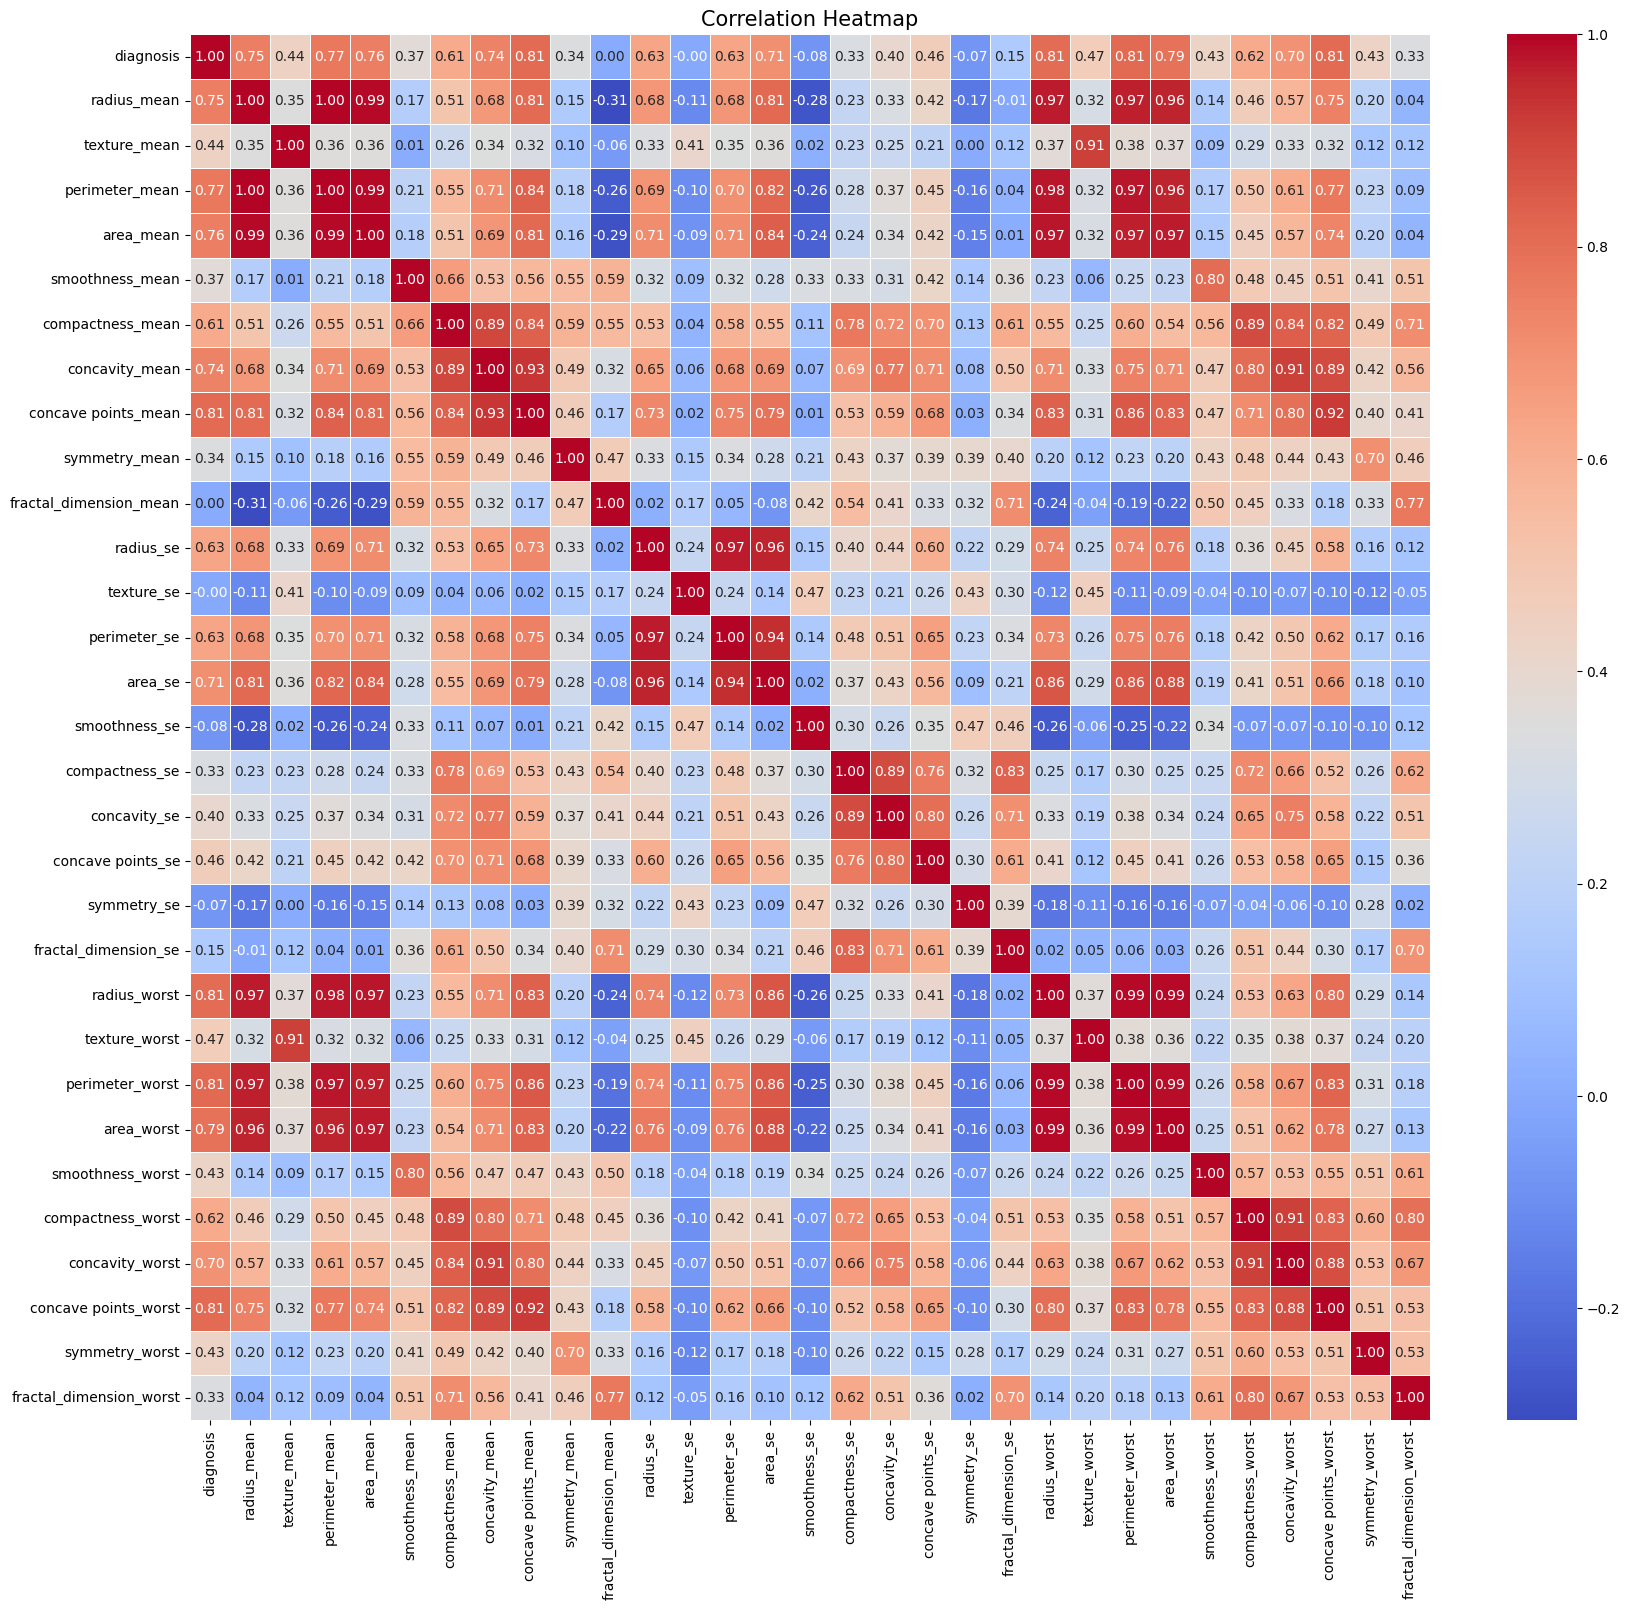


Target Variable (Diagnosis) vs Other Correlation Matrixes
diagnosis                  1.000000
radius_mean                0.754803
texture_mean               0.437002
perimeter_mean             0.770636
area_mean                  0.755234
smoothness_mean            0.372578
compactness_mean           0.614778
concavity_mean             0.743371
concave points_mean        0.806934
symmetry_mean              0.339232
fractal_dimension_mean     0.002872
radius_se                  0.633426
texture_se                -0.000437
perimeter_se               0.632905
area_se                    0.705290
smoothness_se             -0.079360
compactness_se             0.330653
concavity_se               0.402503
concave points_se          0.461459
symmetry_se               -0.070964
fractal_dimension_se       0.152205
radius_worst               0.805018
texture_worst              0.466922
perimeter_worst            0.814887
area_worst                 0.790701
smoothness_worst           0.426839
compa

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_winsor['diagnosis'] = le.fit_transform(df['diagnosis'])

print("Encoded Diagnosis Column")


df_corr_prep = data_winsor.drop(columns=["id"])
display(df_corr_prep.head())

df_corr = df_corr_prep.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar=True)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

print("\nTarget Variable (Diagnosis) vs Other Correlation Matrixes")
target_corr = df_corr["diagnosis"]
print(target_corr)

In [ ]:
df_corr.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
y = data_winsor["diagnosis"]
X = data_winsor.drop(columns=["diagnosis"])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train Set (X_train):", X_train.shape)
print("Test Set (X_test):", X_test.shape)
print("Train Set (y_train):", y_train.shape)
print("Test Set (y_test):", y_test.shape)

Train Set (X_train): (455, 31)
Test Set (X_test): (114, 31)
Train Set (y_train): (455,)
Test Set (y_test): (114,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

print("Scaled Train Set (X_train):")
display(X_train.head())
print("\nScaled Test Set (X_test):")
display(X_test.head())

Scaled Train Set (X_train):


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.243221,0.610779,1.003989,0.514441,0.514280,-1.083361,-0.746316,-0.744513,-0.408481,-1.164988,...,0.673685,1.460334,0.558964,0.592292,-0.635767,-0.690739,-0.646189,-0.243532,0.110884,0.065618
1,0.408373,-0.550465,-1.613921,-0.578351,-0.594135,0.567314,-0.680245,-0.647045,-0.302272,0.624749,...,-0.618823,-1.670575,-0.654335,-0.647175,0.320670,-0.900073,-0.760739,-0.336473,-0.127862,-1.024460
2,-0.242771,-0.384124,0.522149,-0.405154,-0.426727,-1.604669,-0.397538,-0.344016,-0.818670,-0.949057,...,-0.414384,0.222030,-0.500819,-0.447714,-1.697694,-0.407955,-0.446122,-0.939638,-0.796744,-0.129571
3,-0.242751,0.259267,0.821044,0.486949,0.139605,0.302282,2.260967,2.243419,1.391164,0.965256,...,0.028567,0.322969,0.611673,-0.062198,0.480076,2.317058,2.190639,1.953484,-0.050910,2.074578
4,-0.243167,1.423650,0.233561,1.403337,1.498135,-0.101234,0.098841,0.898984,0.833353,-0.463212,...,1.155252,0.267092,1.089349,1.114151,0.100315,-0.275010,0.402709,0.540264,-1.086791,-0.602955



Scaled Test Set (X_test):


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.243074,-0.836068,-1.613921,-0.830816,-0.796087,-0.154558,-0.742928,-0.714338,-0.605687,-0.587787,...,-0.773288,-1.670575,-0.760741,-0.726795,1.084882,-0.074490,-0.306762,-0.405384,0.245055,0.111659
1,-0.242924,2.041934,1.086443,2.035644,2.218920,0.400177,1.242375,2.243419,2.202244,1.646270,...,2.125200,0.220227,1.926107,2.366201,-0.495114,0.499893,2.190639,1.519014,0.462097,-0.325409
2,-0.242801,0.657857,-0.843493,0.679391,0.483389,0.248958,0.886608,-0.269640,0.175812,0.753478,...,0.169402,-1.196522,0.206471,-0.002793,-0.382592,0.043031,-0.300427,0.159904,0.515371,0.395041
3,-0.243093,0.108620,0.109880,0.137806,-0.001563,0.147084,0.257665,0.118107,0.300333,0.292548,...,0.024023,0.915985,0.087876,-0.075193,0.536338,0.392655,0.269683,0.659624,-0.342930,0.649890
4,-0.180802,-0.217784,2.011472,-0.235164,-0.284895,-0.256432,-0.586009,-0.812514,-0.425103,-1.650834,...,-0.266734,1.900139,-0.334127,-0.324365,-0.677963,-0.786225,-1.046691,-0.595563,-1.372891,-0.438243


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_lr = logistic_regression.predict(X_test)
print("Logistic Regression Model Performance:")
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Testing Accuracy:, {acc_lr:.2f}")

print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

print("\nClassification Report:")
cr_lr = classification_report(y_test, y_pred_lr)
print(cr_lr)

Logistic Regression Model Performance:
Testing Accuracy:, 0.98

Confusion Matrix:
[[72  0]
 [ 2 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm.predict(X_test)

print("SVM Model Performance:")
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Testing Accuracy:, {acc_svm:.2f}")

print("\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print("\nClassification Report:")
cr_svm = classification_report(y_test, y_pred_svm)
print(cr_svm)

SVM Model Performance:
Testing Accuracy:, 0.97

Confusion Matrix:
[[71  1]
 [ 2 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = decision_tree.predict(X_test)

print("Decision Tree Model Performance:")
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Testing Accuracy:, {acc_dt:.2f}")

print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

print("\nClassification Report:")
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

Decision Tree Model Performance:
Testing Accuracy:, 0.94

Confusion Matrix:
[[70  2]
 [ 5 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = random_forest.predict(X_test)

print("Random Forest Model Performance:")
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Testing Accuracy:, {acc_rf:.2f}")

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

print("\nClassification Report:")
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

Random Forest Model Performance:
Testing Accuracy:, 0.97

Confusion Matrix:
[[72  0]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Model Performance:")
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Testing Accuracy:, {acc_knn:.2f}")

print("\nConfusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print("\nClassification Report:")
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

K-Nearest Neighbors Model Performance:
Testing Accuracy:, 0.94

Confusion Matrix:
[[71  1]
 [ 6 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



,Model,Accuracy,Precision (Malignant),Recall (Malignant),F1-Score (Malignant)
0,Logistic Regression,0.982456,1.000000,0.952381,0.975610
1,SVM,0.973684,0.975610,0.952381,0.963855
3,Random Forest,0.973684,1.000000,0.928571,0.962963
2,Decision Tree,0.938596,0.948718,0.880952,0.913580
4,K-Nearest Neighbors,0.938596,0.972973,0.857143,0.911392


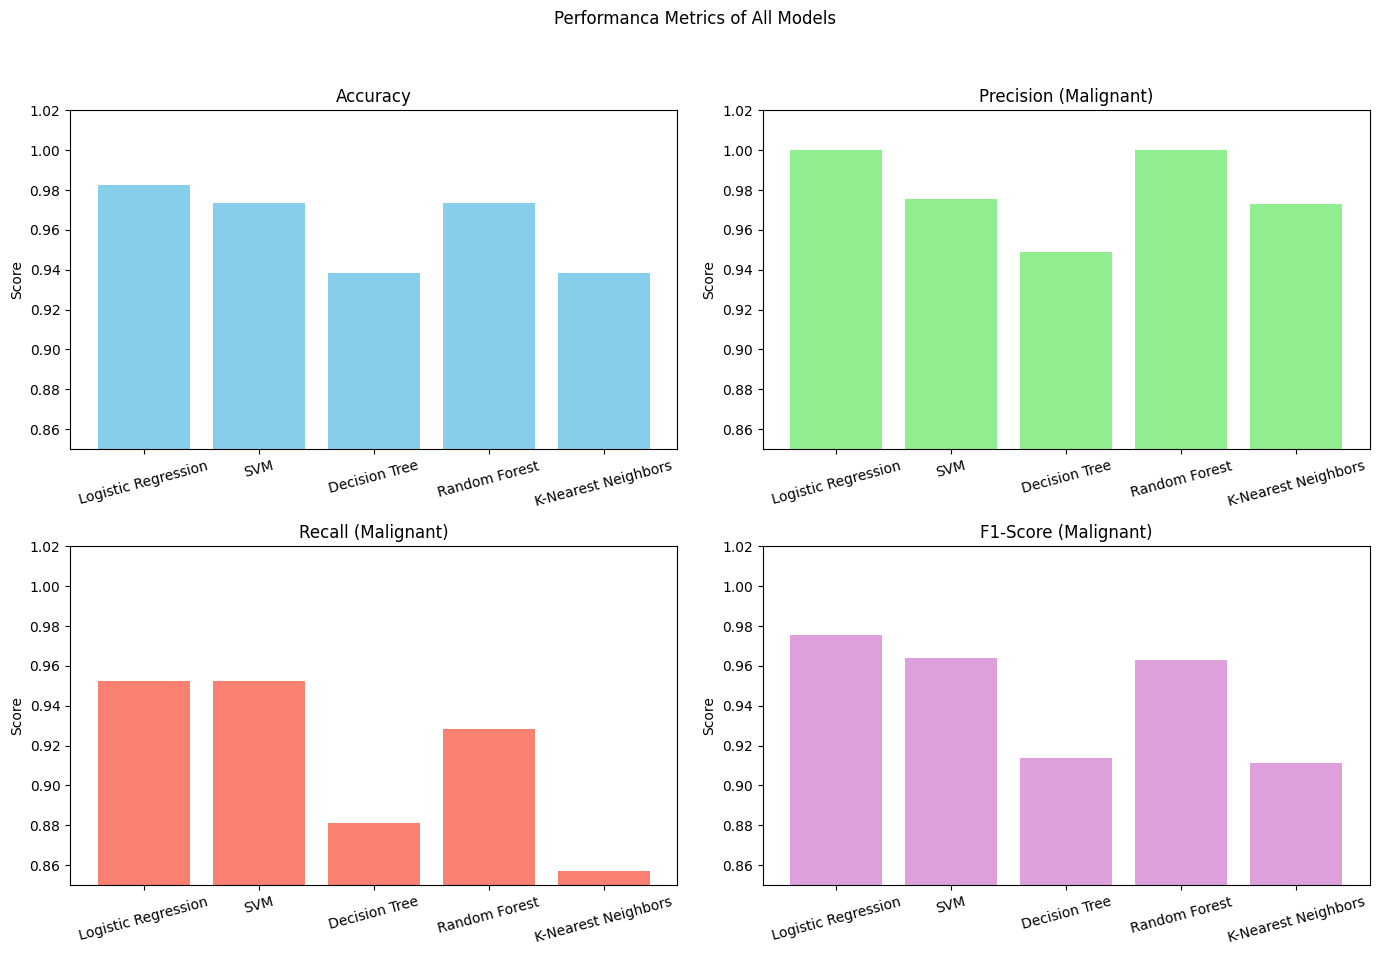

In [ ]:
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)

name_models = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "K-Nearest Neighbors"]
accuracy = [acc_lr, acc_svm, acc_dt, acc_rf, acc_knn]
precision = [lr_report['1']['precision'], svm_report['1']['precision'], dt_report['1']['precision'], rf_report['1']['precision'], knn_report['1']['precision']]
recalls = [lr_report['1']['recall'], svm_report['1']['recall'], dt_report['1']['recall'], rf_report['1']['recall'], knn_report['1']['recall']]
f1_score = [lr_report['1']['f1-score'], svm_report['1']['f1-score'], dt_report['1']['f1-score'], rf_report['1']['f1-score'], knn_report['1']['f1-score']]

performance_of_all = {'Model': name_models, 'Accuracy': accuracy, 'Precision (Malignant)': precision, 'Recall (Malignant)': recalls, 'F1-Score (Malignant)': f1_score}
df_models = pd.DataFrame(performance_of_all)
display(df_models.sort_values(by='Accuracy', ascending=False))


metrics = ["Accuracy", "Precision (Malignant)", "Recall (Malignant)", "F1-Score (Malignant)"]
colors = ["skyblue", "lightgreen", "salmon", "plum"]

fig, axes = plt.subplots(2,2, figsize = (14,10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
  axes[i].bar(df_models["Model"], df_models[metric], color = colors[i])
  axes[i].set_title(metric)
  axes[i].set_ylim(0.85, 1.02)
  axes[i].set_ylabel("Score")
  axes[i].tick_params(axis = "x", rotation = 15)

plt.suptitle("Performanca Metrics of All Models")
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

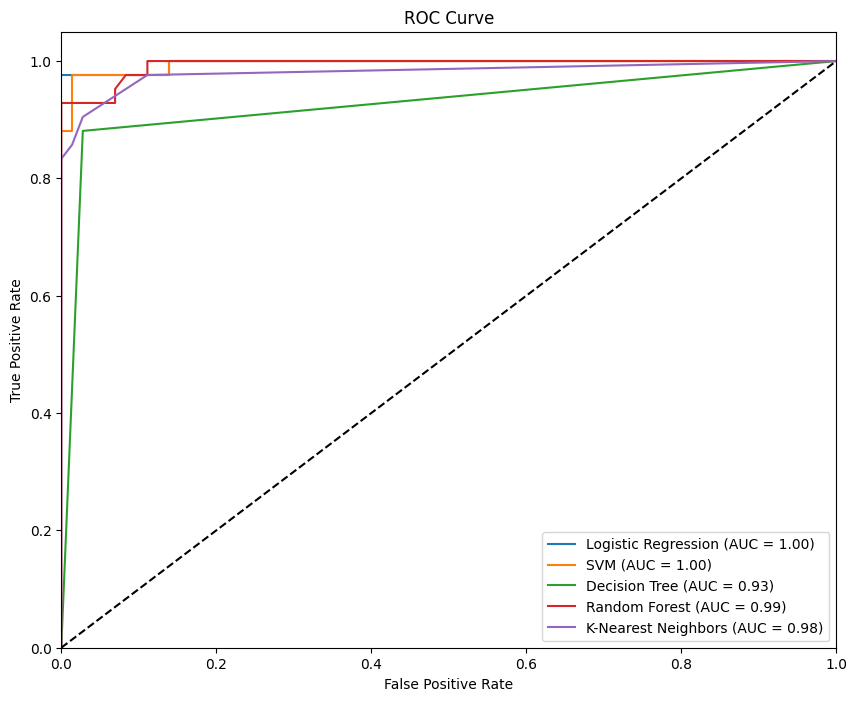

,Model,Accuracy,Precision (Malignant),Recall (Malignant),F1-Score (Malignant),AUC Score
0,Logistic Regression,0.982456,1.000000,0.952381,0.975610,0.996693
1,SVM,0.973684,0.975610,0.952381,0.963855,0.995370
3,Random Forest,0.973684,1.000000,0.928571,0.962963,0.993882
4,K-Nearest Neighbors,0.938596,0.972973,0.857143,0.911392,0.980655
2,Decision Tree,0.938596,0.948718,0.880952,0.913580,0.926587


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

models_roc = {"Logistic Regression": logistic_regression, "SVM": svm, "Decision Tree": decision_tree, "Random Forest": random_forest, "K-Nearest Neighbors": knn}
auc_score = []

for model_name, model_obj in models_roc.items():
  if model_name == "SVM" and not hasattr(model_obj, 'predict_proba'):
    y_score = model_obj.decision_function(X_test)
  else:
    y_score = model_obj.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, y_score)
  auc_value = roc_auc_score(y_test, y_score)
  auc_score.append(auc_value)

  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

df_models['AUC Score'] = auc_score
display(df_models.sort_values(by='AUC Score', ascending=False))

# **Hyperparameter Optimization**

## **Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regression_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

lr_grid_search = GridSearchCV(estimator = LogisticRegression(random_state=42), param_grid = logistic_regression_grid, cv = 5, n_jobs = -1, verbose = 1)
print("Grid Search of Logistic Regression")
lr_grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for Logistic Regression:")
print(lr_grid_search.best_params_)

print("\Average ROC AUC Score of Logistic Regression:")
print(f"{lr_grid_search.best_score_:.2f}")

lr_best_model = lr_grid_search.best_estimator_

print("\nBest Model for Logistic Regression Found")

Grid Search of Logistic Regression
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Hyperparameters for Logistic Regression:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
\Average ROC AUC Score of Logistic Regression:
0.98

Best Model for Logistic Regression Found


# **Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

rf_grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid = random_forest_grid, scoring='roc_auc', cv = 5, n_jobs = -1, verbose = 1)
print("Grid Search of Random Forest")
rf_grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

print("\nAverage ROC AUC Score of Random Forest:")
print(f"{rf_grid_search.best_score_:.2f}")

rf_best_model = rf_grid_search.best_estimator_

Grid Search of Random Forest
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Hyperparameters for Random Forest:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Average ROC AUC Score of Random Forest:
0.99


# **SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

svm_grid_search = GridSearchCV(estimator = SVC(random_state=42), param_grid = svm_grid, scoring='roc_auc', cv = 5, n_jobs=-1, verbose = 1)
print("Grid Search of SVM")
svm_grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for SVM:")
print(svm_grid_search.best_params_)

print("\nAverage ROC AUC Score of SVM:")
print(f"{svm_grid_search.best_score_:.2f}")

svm_best_model = svm_grid_search.best_estimator_

Grid Search of SVM
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Hyperparameters for SVM:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Average ROC AUC Score of SVM:
1.00


# **Final Overhaul**

In [ ]:
tuned_models = []

y_pred_lr_tuned = lr_best_model.predict(X_test)
y_pred_prob_lr_tuned = lr_best_model.predict_proba(X_test)[:, 1]

accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
cm_lr_tuned = confusion_matrix(y_test, y_pred_lr_tuned)
cr_lr_tuned = classification_report(y_test, y_pred_lr_tuned, output_dict=True)
auc_lr_tuned = roc_auc_score(y_test, y_pred_prob_lr_tuned)

print(f"\nAccuracy of Logistic Regression (Tuned)): {accuracy_lr_tuned:.2f}")
print("\nConfusion Matrix of Logistic Regression (Tuned):")
print(cm_lr_tuned)
print("Classification Report of Logistic Regression (Tuned):")
print(classification_report(y_test, y_pred_lr_tuned))
print(f"AUC Score of Logistic Regression (Tuned): {auc_lr_tuned:.2f}")

lr_tuned_new = {
    "Model": "Logistic Regression (Tuned)",
    "Accuracy": accuracy_lr_tuned,
    "Precision (Malignant)": cr_lr_tuned["1"]["precision"],
    "Recall (Malignant)": cr_lr_tuned["1"]["recall"],
    "F1-Score (Malignant)":cr_lr_tuned["1"]["f1-score"],
    "AUC Score": auc_lr_tuned
}

tuned_models.append(lr_tuned_new)

print("\n---------------------------------------------------------------------")

y_pred_rf_tuned = rf_best_model.predict(X_test)
y_pred_prob_rf_tuned = rf_best_model.predict_proba(X_test)[:, 1]

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
cr_rf_tuned = classification_report(y_test, y_pred_rf_tuned, output_dict=True)
auc_rf_tuned = roc_auc_score(y_test, y_pred_prob_rf_tuned)

print(f"\nAccuracy of Random Forest (Tuned)): {accuracy_rf_tuned:.2f}")
print("\nConfusion Matrix of Random Forest (Tuned):")
print(cm_rf_tuned)
print("Classification Report of Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf_tuned))
print(f"AUC Score of Random Forest (Tuned): {auc_rf_tuned:.2f}")

rf_tuned_new = {
    "Model": "Random Forest (Tuned)",
    "Accuracy": accuracy_rf_tuned,
    "Precision (Malignant)": cr_rf_tuned["1"]["precision"],
    "Recall (Malignant)": cr_rf_tuned["1"]["recall"],
    "F1-Score (Malignant)":cr_rf_tuned["1"]["f1-score"],
    "AUC Score": auc_rf_tuned
}

tuned_models.append(rf_tuned_new)

print("\n---------------------------------------------------------------------")

y_pred_svm_tuned = svm_best_model.predict(X_test)
y_pred_score_svm_tuned = svm_best_model.decision_function(X_test)

accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)
cr_svm_tuned = classification_report(y_test, y_pred_svm_tuned, output_dict=True)
auc_svm_tuned = roc_auc_score(y_test, y_pred_score_svm_tuned)

print(f"\nAccuracy of SVM (Tuned)): {accuracy_svm_tuned:.2f}")
print("\nConfusion Matrix of SVM (Tuned):")
print(cm_svm_tuned)
print("Classification Report of SVM (Tuned):")
print(classification_report(y_test, y_pred_svm_tuned))
print(f"AUC Score of SVM (Tuned): {auc_svm_tuned:.2f}")

svm_tuned_new = {
    "Model": "SVM (Tuned)",
    "Accuracy": accuracy_svm_tuned,
    "Precision (Malignant)": cr_svm_tuned["1"]["precision"],
    "Recall (Malignant)": cr_svm_tuned["1"]["recall"],
    "F1-Score (Malignant)":cr_svm_tuned["1"]["f1-score"],
    "AUC Score": auc_svm_tuned
}

tuned_models.append(svm_tuned_new)


Accuracy of Logistic Regression (Tuned)): 0.98

Confusion Matrix of Logistic Regression (Tuned):
[[72  0]
 [ 2 40]]
Classification Report of Logistic Regression (Tuned):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

AUC Score of Logistic Regression (Tuned): 1.00

---------------------------------------------------------------------

Accuracy of Random Forest (Tuned)): 0.96

Confusion Matrix of Random Forest (Tuned):
[[72  0]
 [ 4 38]]
Classification Report of Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg 


Data Frame of Tuned Models
Combined Data Frames:


,Model,Accuracy,Precision (Malignant),Recall (Malignant),F1-Score (Malignant),AUC Score
5,Logistic Regression (Tuned),0.982456,1.000000,0.952381,0.975610,0.998016
0,Logistic Regression,0.982456,1.000000,0.952381,0.975610,0.996693
6,Random Forest (Tuned),0.964912,1.000000,0.904762,0.950000,0.995701
7,SVM (Tuned),0.973684,1.000000,0.928571,0.962963,0.995701
1,SVM,0.973684,0.975610,0.952381,0.963855,0.995370
3,Random Forest,0.973684,1.000000,0.928571,0.962963,0.993882
4,K-Nearest Neighbors,0.938596,0.972973,0.857143,0.911392,0.980655
2,Decision Tree,0.938596,0.948718,0.880952,0.913580,0.926587



Graphical Comparison of Tuned Models


<ipython-input-31-00779dbd8eb4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AUC Score", y="Model", data = df_all_models_sorted_auc, palette = "viridis")


Text(0, 0.5, 'Model')

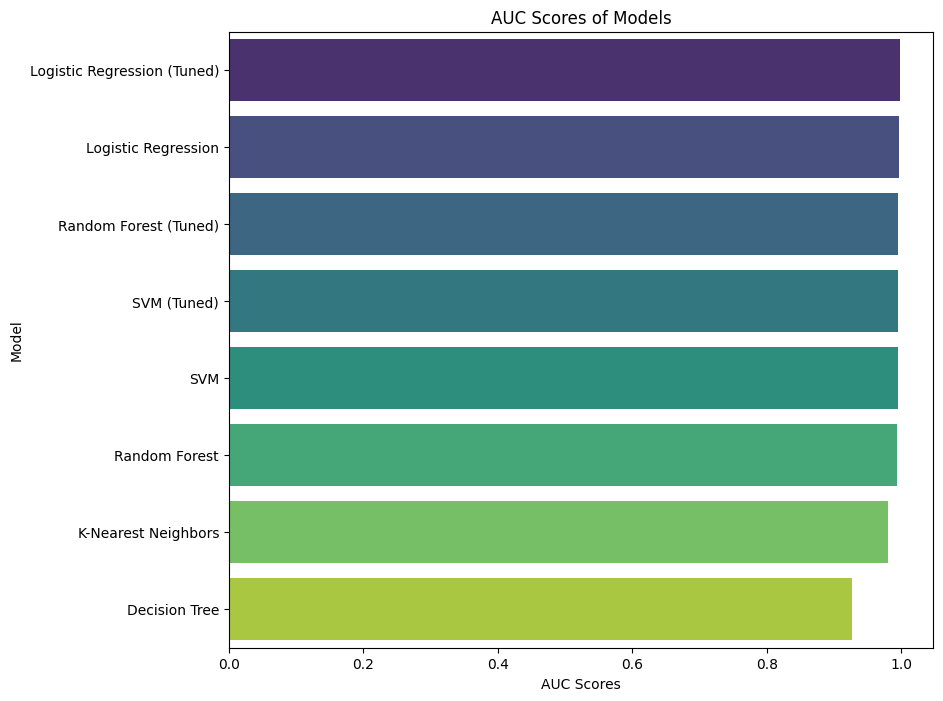

In [ ]:
print("\nData Frame of Tuned Models")
df_tuned_models = pd.DataFrame(tuned_models)


df_all_models = pd.concat([df_models, df_tuned_models], ignore_index = True)


df_all_models_sorted_auc = df_all_models.sort_values(by="AUC Score", ascending = False)
print("Combined Data Frames:")
display(df_all_models_sorted_auc)


print("\nGraphical Comparison of Tuned Models")

plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.barplot(x="AUC Score", y="Model", data = df_all_models_sorted_auc, palette = "viridis")
plt.title("AUC Scores of Models")
plt.xlabel("AUC Scores")
plt.ylabel("Model")




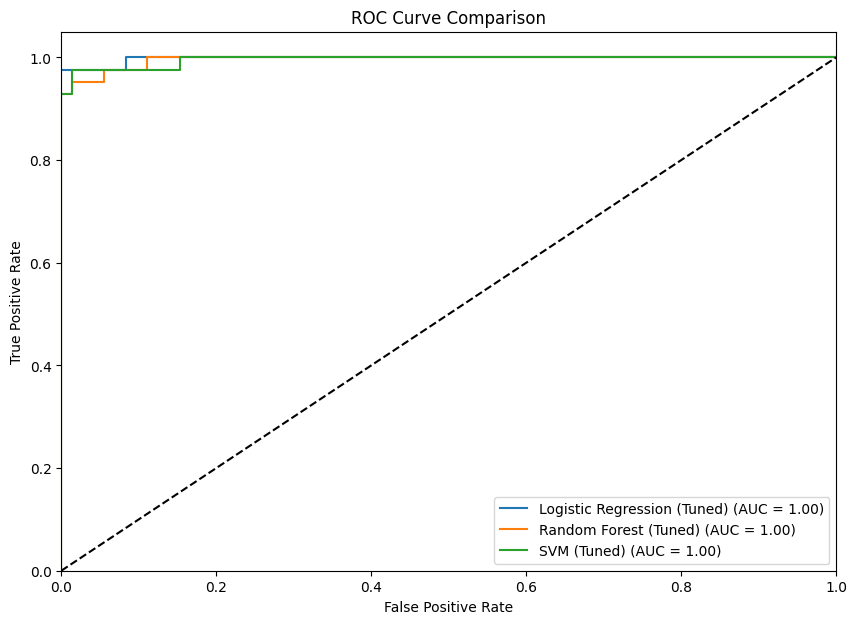

In [ ]:
plt.figure(figsize=(10,7))

fpr_lr_tuned, tpr_lr_tuned, _ = roc_curve(y_test, y_pred_prob_lr_tuned)
plt.plot(fpr_lr_tuned, tpr_lr_tuned, label = f"Logistic Regression (Tuned) (AUC = {auc_lr_tuned:.2f})")

fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, y_pred_prob_rf_tuned)
plt.plot(fpr_rf_tuned, tpr_rf_tuned, label = f"Random Forest (Tuned) (AUC = {auc_rf_tuned:.2f})")

fpr_svm_tuned, tpr_svm_tuned, _ = roc_curve(y_test, y_pred_score_svm_tuned)
plt.plot(fpr_svm_tuned, tpr_svm_tuned, label = f"SVM (Tuned) (AUC = {auc_svm_tuned:.2f})")


plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0 ,1.0])
plt.ylim([0.0 ,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc = "lower right")
plt.show()

